# Центральная предельная теорема

Будем использовать Бета-распределение
[Ссылка на википедию](https://ru.wikipedia.org/wiki/Бета-распределение)

$$ X \sim Be(\alpha, \beta)$$

С функцией распределениея
$$f_X(x) = \frac{1}{B(\alpha,\beta)}x^{\alpha-1}(1-x)^{\beta-1}$$

Импортируем все используемые далее библиотеки

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

Зададим бета распределение с параметрами $$\alpha = 0.5$$ $$\beta = 0.5$$

In [2]:
a = 0.5
b = 0.5
beta_rv = sts.beta(a, b)

Сгенерируем 1000 значений

In [3]:
sample = beta_rv.rvs(size=1000)

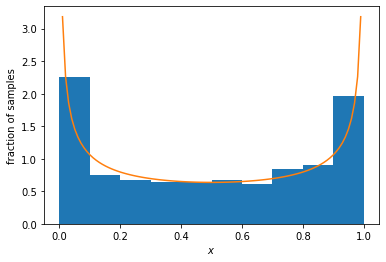

In [4]:
# Рисуем гистограмму
plt.hist(sample, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

# На том же графике построим теоретическую плотность распределения:
x = np.linspace(0, 1, 100)
pdf = beta_rv.pdf(x)
plt.plot(x, pdf)

Опишем функцию от n для генерации 1000 выборок объёма n, которая возвращает их выборочные средние.

Выборочные средние считаем по формуле $$\bar X = \frac1n \sum^n_{i=1}{X_i}$$

In [5]:
def gen_samples(n):
    sample_mean_n = []
    for i in range(1000):
        sample_n = beta_rv.rvs(size=n)
        sample_mean_n.append(sum(sample_n) / n)
    return sample_mean_n


Опишем функцию для описания нормального распределения по параметрам бета-распределения
$$ \mathbb{E}X = \frac\alpha{\alpha + \beta} $$

$$ \mathbb{D}X = \frac{\alpha\beta}{(\alpha+\beta)^2 (\alpha + \beta + 1)}$$

Нормальное распределение будет задаваться как $$N(\mathbb{E}X, \frac{\mathbb{D}X}{n})$$

In [6]:
def gen_norm_from_beta(a, b, n):
    # Считаем параметры
    mu = a / (a+b)
    dispersion = (a * b) / ((a+b)**2 * (a+b+1))
    # Задаем нормальное распределение
    norm_rv = sts.norm(loc=mu, scale=(dispersion / n) ** 0.5 )
    # Генерируем 100 значений и считаем плотность распределения
    norm_rv.rvs(size=100)
    x = np.linspace(0,1,100)
    pdf = norm_rv.pdf(x)
    # Рисуетм график плотности распределения
    plt.plot(x, pdf)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

Опишем функцию для генерации гистограммы

In [7]:
def gen_hist(samples):
    plt.hist(samples, density=True)
    plt.ylabel('fraction of samples')
    plt.xlabel('$x$')

### Рисуем гистограммы для $$ n = \{5, 10, 50\}$$

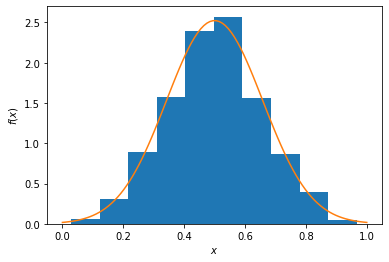

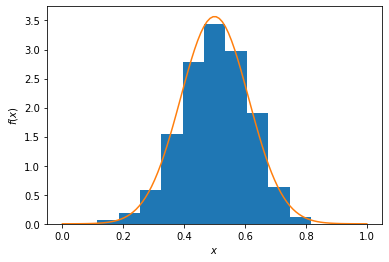

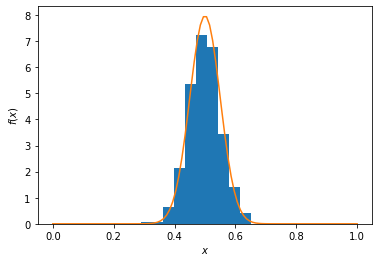

In [8]:
# Рисуем гистограмму для n=5
gen_hist(gen_samples(5))
gen_norm_from_beta(a, b, 5)
plt.show()

# Рисуем гистограмму для n=10
gen_hist(gen_samples(10))
gen_norm_from_beta(a, b, 10)
plt.show()

# Рисуем гистограмму для n=50
gen_hist(gen_samples(50))
gen_norm_from_beta(a, b, 50)
plt.show()

## Выводы:
Как мы видим, при увеличении значения n, график все больше сходится вокруг средлнего значения.
Становится более вытянутым и приближается к нормальному распределению. Точность аппроксимации при этом увеличивается.